In [33]:
import numpy as np 
import pandas as pd 
import os
import math
import operator
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import sklearn.neighbors as sn
# import seaborn as sns; sns.set()
from statistics import stdev,mean
import scipy.stats as ss
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [34]:
admission = pd.read_csv("./AdmissionDataset/data.csv")
admission.head()

,Serial,GREScore,Tscore,Urating,SOP,LOR,CGPA,Research,Coa
0,242,317,103,2,2.5,2.0,8.15,0,0.65
1,334,319,108,3,3.0,3.5,8.54,1,0.71
2,4,322,110,3,3.5,2.5,8.67,1,0.80
3,45,326,113,5,4.5,4.0,9.40,1,0.91
4,232,319,106,3,3.5,2.5,8.33,1,0.74


In [35]:
def plotFeatures(col_list,title,label,df):
    plt.figure(figsize=(10, 14))
    i = 0
    print(len(col_list))
    for col in col_list:
        i+=1
        plt.subplot(7,2,i)
        plt.plot(df[col],df[label],marker='.',linestyle='none')
        xlabel(col)
        ylabel(label)
        plt.title(title % (col))   
        plt.tight_layout()

In [36]:
print(admission.keys())
y_adm = admission.Coa.values
print(len(admission.Coa.unique()))
X_adm = admission.iloc[:,:].drop('Coa', axis = 1)
X_adm = X_adm.drop('Serial', axis = 1)
#X_adm = X_adm.drop('Research', axis = 1)
print(y_adm.shape)
print(X_adm.shape)
X_adm_train,X_adm_val,y_adm_train,y_adm_val=train_test_split(X_adm,y_adm,test_size=0.2,random_state=42)


X_adm_train=X_adm_train.values
X_adm_val=X_adm_val.values

Index(['Serial', 'GREScore', 'Tscore', 'Urating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Coa'],
      dtype='object')
60
(450,)
(450, 7)


9


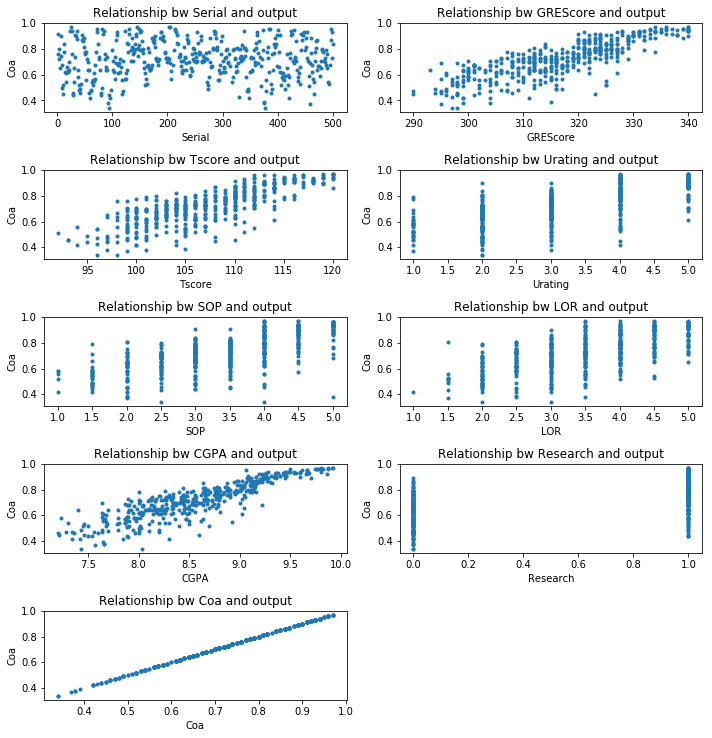

In [37]:
colnames = list(admission.keys())
plotFeatures(colnames,"Relationship bw %s and output", 'Coa',admission)

In [25]:
def mean_square(train, l_rate, n_epoch,Class):
    #print(type(train[0].values))
    m=train.shape[0]
    w = np.zeros((train.shape[1],1))
    b = 0
    v= np.ones((m,1))
    mean = np.mean(train,0)
    std = np.std(train,0)
    train=(train-mean)/std;
    for i in range(n_epoch):
        Class = Class.reshape((-1,1))
        yhat= (np.dot(train,w) + b*v).reshape((-1,1))
        J = (1/(2*m))*(np.dot(np.transpose(yhat-Class),yhat-Class))
        dw =  np.dot(np.transpose(train),yhat-Class)
        db =  np.dot(np.transpose(v),yhat-Class)
        w = w - l_rate*dw
        b = b - l_rate*db[0][0]
    
    
    #print("Error Value",J)
    
    return w,b

In [26]:
def linear_regression(train_data,l_rate, n_epoch,Class,inp,function):
    if(function == 'MSE'):
         w,b = mean_square(train_data, l_rate, n_epoch,Class)
    elif(function == 'MAE'):
         coef = mean_absolute(train_data, l_rate, n_epoch,Class)
    elif(function == 'MAPE'):
         coef = MAPE(train_data,l_rate, n_epoch, n_epoch,Class)
    
    mean = np.mean(train_data,0)
    std = np.std(train_data)
    inp = (inp-mean)/std;
    prob=inp.dot(inp,w)+b
    return prob     

In [16]:

value = linear_regression(X_adm_train,0.0007,1000,y_adm_train,X_adm_val,'MSE')
print("prob",value)

prob [[0.72302509]
 [0.72739082]
 [0.71768797]
 [0.72528457]
 [0.7252063 ]
 [0.72042904]
 [0.72983871]
 [0.72650197]
 [0.72615338]
 [0.71681917]
 [0.71805603]
 [0.72425625]
 [0.72567822]
 [0.72562822]
 [0.72635332]
 [0.72072511]
 [0.72634337]
 [0.71824628]
 [0.72090338]
 [0.72142291]
 [0.71881601]
 [0.72330526]
 [0.72150456]
 [0.7166223 ]
 [0.72317236]
 [0.72683886]
 [0.7212113 ]
 [0.72015819]
 [0.71990263]
 [0.72217288]
 [0.71898754]
 [0.72343183]
 [0.72155283]
 [0.72526614]
 [0.72986241]
 [0.72630019]
 [0.72697083]
 [0.72415232]
 [0.7217847 ]
 [0.71785689]
 [0.72729175]
 [0.72183823]
 [0.72169028]
 [0.72594351]
 [0.72498754]
 [0.71895953]
 [0.72404069]
 [0.72264404]
 [0.72248943]
 [0.71913228]
 [0.72579462]
 [0.72071719]
 [0.7226647 ]
 [0.72136406]
 [0.72156406]
 [0.72631691]
 [0.7263723 ]
 [0.72361925]
 [0.72963541]
 [0.72514365]
 [0.72196456]
 [0.71775076]
 [0.72643786]
 [0.72574766]
 [0.72067835]
 [0.72068873]
 [0.72993748]
 [0.72049589]
 [0.72996541]
 [0.72573295]
 [0.72373257]
 

### Mean square error loss function

In [30]:
score = 0
for ind in range(0,X_adm_val.shape[0]):
    error = value[ind] - y_adm_val[ind]
    score += error ** 2
print(score)

[1.70707864]


### Mean Absolute error function 

In [31]:
score1 = 0
for ind in range(0,X_adm_val.shape[0]):
    error = value[ind] - y_adm_val[ind]
    score1 += abs(error)
print(score1)

[9.82869711]


### Mean absolute percentage error function

In [32]:
score2 = 0
for ind in range(0,X_adm_val.shape[0]):
    error = y_adm_val[ind] - value[ind]
    score2 += float(error)/float(y_adm_val[ind])
print(score2)

-5.674300454126396
